In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier

ModuleNotFoundError: No module named 'numpy'

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\day5_assign_machine_failure_dataset - day5_assign_machine_failure_dataset.csv")

In [6]:
num_features = df.drop(columns=['Machine_Type','Failure_Risk'],axis=1)
# cat_features = df.select_dtypes(include=[np.object_]).columns.to_list()

In [4]:
cat_features = df[['Machine_Type']]

In [68]:
cat_features

,Machine_Type
0,Mill
1,Lathe
2,Drill
3,Lathe
4,Drill
...,...
995,Lathe
996,Drill
997,Mill
998,Mill


In [5]:
encoder = LabelEncoder() 
cat_encoded = pd.DataFrame(encoder.fit_transform(cat_features)) 
cat_encoded.columns = ['Machine_Type'] 

c:\Users\User\Desktop\test\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
target = df['Failure_Risk']


In [10]:
# df_num_scaled = pd.DataFrame(num_scaled, columns=[f'num_scaled_{i}' for i in range(num_scaled.shape[1])])
# df_cat_features = pd.DataFrame(cat_features, columns=['cat_feature_0']) 

final_df = pd.concat([num_features, cat_encoded, target], axis=1)

<Axes: >

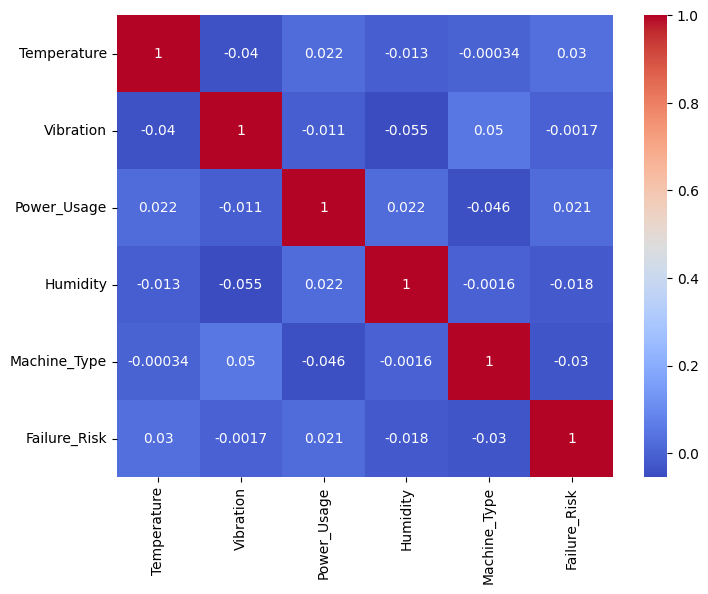

In [11]:
correlation_matrix = final_df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

In [36]:
x = final_df.drop(columns=['Failure_Risk'],axis=1) 
y = final_df['Failure_Risk']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [1]:
model = DecisionTreeClassifier(criterion='entropy') # using ‘entropy’ for ID3, using 'gini’ for CART method
model.fit(x_train, y_train)
 
y_pred = model.predict(x_test)

NameError: name 'DecisionTreeClassifier' is not defined

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score

In [59]:
print(' <<<<<<<<<< Confusion Matrix >>>>>>>>>> ')
cfmx = confusion_matrix(y_test,y_pred)
print(cfmx)


 <<<<<<<<<< Confusion Matrix >>>>>>>>>> 
[[108  64]
 [ 54  24]]


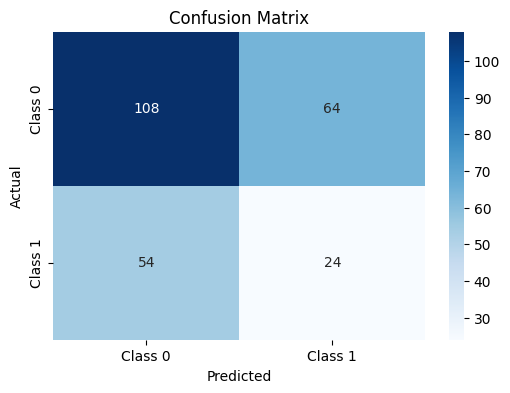

In [60]:
cfmx = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cfmx, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Customize the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [61]:
print("<<<<< Model Evaluation Matrix >>>>>")
print('Accuracy:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision:', '{:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall:', '{:.2f}'.format(recall_score(y_test, y_pred)))
print('F1 Score:', '{:.2f}'.format(f1_score(y_test, y_pred)))
err = (cfmx[0, 1] + cfmx[1, 0]) / y_test.count()
print('Error Rate', '{:.2f}'.format(err))
print()
print("<<<<< Classification Report >>>>>")
print()
print(classification_report(y_test, y_pred))

<<<<< Model Evaluation Matrix >>>>>
Accuracy: 0.53
Precision: 0.27
Recall: 0.31
F1 Score: 0.29
Error Rate 0.47

<<<<< Classification Report >>>>>

              precision    recall  f1-score   support

           0       0.67      0.63      0.65       172
           1       0.27      0.31      0.29        78

    accuracy                           0.53       250
   macro avg       0.47      0.47      0.47       250
weighted avg       0.54      0.53      0.54       250



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15, 20], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 5], 
    'max_features': ['auto', 'sqrt', 'log2'] 
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                          cv=5, scoring='accuracy', n_jobs=-1) 
grid_search.fit(x_train, y_train) 

best_params = grid_search.best_params_ 
print(f"Best Hyperparameters: {best_params}")

In [49]:
best_model = DecisionTreeClassifier(**best_params, criterion='entropy', random_state=42) 
best_model.fit(x_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=5, random_state=42)

In [50]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(x_test) 
accuracy = accuracy_score(y_test, y_pred) 
print(f"Accuracy: {accuracy}")

Accuracy: 0.664
